**Introduction to Artificial Neural Networks**

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [41]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

In [42]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/Users/shahrukh/Code/Home/Machine_Learning/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [43]:
y_pred

array([1])

/Users/shahrukh/Code/Home/Machine_Learning/env/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


Saving figure perceptron_iris_plot


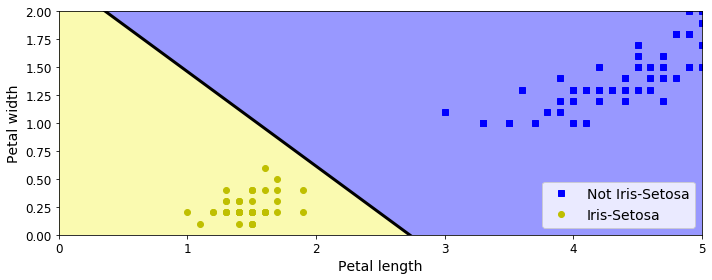

In [44]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [45]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


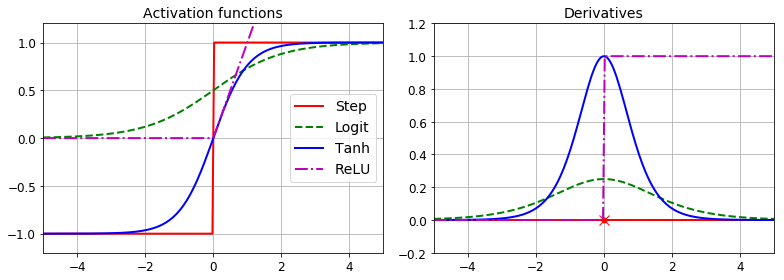

In [46]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [47]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

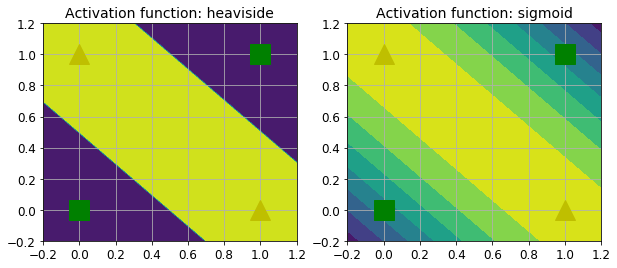

In [48]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST

## using tf.learn

In [49]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [50]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [51]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1190cfd30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/h_/mwzgwq9d7912l4k204s1584w0000gn/T/tmpel15693h'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/h_/mwzgwq9d7912l4k204s1584w0000gn/T/tmpel15693h/model.ckpt.
INFO:tensorflow:loss = 2.2865596, ste

INFO:tensorflow:global_step/sec: 338.951
INFO:tensorflow:loss = 0.023617296, step = 7201 (0.295 sec)
INFO:tensorflow:global_step/sec: 337.416
INFO:tensorflow:loss = 0.0057689724, step = 7301 (0.296 sec)
INFO:tensorflow:global_step/sec: 344.889
INFO:tensorflow:loss = 0.019554693, step = 7401 (0.290 sec)
INFO:tensorflow:global_step/sec: 342.897
INFO:tensorflow:loss = 0.0028316763, step = 7501 (0.291 sec)
INFO:tensorflow:global_step/sec: 336.07
INFO:tensorflow:loss = 0.0290098, step = 7601 (0.298 sec)
INFO:tensorflow:global_step/sec: 338.57
INFO:tensorflow:loss = 0.012490218, step = 7701 (0.295 sec)
INFO:tensorflow:global_step/sec: 349.279
INFO:tensorflow:loss = 0.004221091, step = 7801 (0.286 sec)
INFO:tensorflow:global_step/sec: 332.527
INFO:tensorflow:loss = 0.011796335, step = 7901 (0.301 sec)
INFO:tensorflow:global_step/sec: 340.423
INFO:tensorflow:loss = 0.0031221367, step = 8001 (0.294 sec)
INFO:tensorflow:global_step/sec: 334.97
INFO:tensorflow:loss = 0.020210136, step = 8101 (0.2

INFO:tensorflow:loss = 0.0016350342, step = 15201 (0.305 sec)
INFO:tensorflow:global_step/sec: 299.199
INFO:tensorflow:loss = 0.0031969673, step = 15301 (0.335 sec)
INFO:tensorflow:global_step/sec: 329.168
INFO:tensorflow:loss = 0.003476299, step = 15401 (0.303 sec)
INFO:tensorflow:global_step/sec: 327.195
INFO:tensorflow:loss = 0.0063731237, step = 15501 (0.306 sec)
INFO:tensorflow:global_step/sec: 289.858
INFO:tensorflow:loss = 0.0043329024, step = 15601 (0.345 sec)
INFO:tensorflow:global_step/sec: 322.466
INFO:tensorflow:loss = 0.009507208, step = 15701 (0.310 sec)
INFO:tensorflow:global_step/sec: 274.121
INFO:tensorflow:loss = 0.00094377506, step = 15801 (0.365 sec)
INFO:tensorflow:global_step/sec: 334.634
INFO:tensorflow:loss = 0.0004562597, step = 15901 (0.299 sec)
INFO:tensorflow:global_step/sec: 329.214
INFO:tensorflow:loss = 0.008790955, step = 16001 (0.304 sec)
INFO:tensorflow:global_step/sec: 273.334
INFO:tensorflow:loss = 0.002252589, step = 16101 (0.366 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 268.299
INFO:tensorflow:loss = 0.0017352236, step = 23201 (0.371 sec)
INFO:tensorflow:global_step/sec: 331.98
INFO:tensorflow:loss = 0.002226826, step = 23301 (0.301 sec)
INFO:tensorflow:global_step/sec: 292.843
INFO:tensorflow:loss = 0.0007256684, step = 23401 (0.342 sec)
INFO:tensorflow:global_step/sec: 324.938
INFO:tensorflow:loss = 0.00059190457, step = 23501 (0.307 sec)
INFO:tensorflow:global_step/sec: 295.537
INFO:tensorflow:loss = 0.00066422636, step = 23601 (0.339 sec)
INFO:tensorflow:global_step/sec: 237.451
INFO:tensorflow:loss = 0.0004310972, step = 23701 (0.421 sec)
INFO:tensorflow:global_step/sec: 309.958
INFO:tensorflow:loss = 0.0011430397, step = 23801 (0.322 sec)
INFO:tensorflow:global_step/sec: 327.081
INFO:tensorflow:loss = 0.0017941196, step = 23901 (0.306 sec)
INFO:tensorflow:global_step/sec: 336.675
INFO:tensorflow:loss = 0.0010763649, step = 24001 (0.297 sec)
INFO:tensorflow:global_step/sec: 279.96
INFO:tensorflow:loss = 0.00051401

INFO:tensorflow:global_step/sec: 298.521
INFO:tensorflow:loss = 0.00037729822, step = 31201 (0.335 sec)
INFO:tensorflow:global_step/sec: 273.627
INFO:tensorflow:loss = 0.0007811908, step = 31301 (0.366 sec)
INFO:tensorflow:global_step/sec: 313.876
INFO:tensorflow:loss = 0.001277635, step = 31401 (0.318 sec)
INFO:tensorflow:global_step/sec: 258.159
INFO:tensorflow:loss = 0.00018046824, step = 31501 (0.388 sec)
INFO:tensorflow:global_step/sec: 303.299
INFO:tensorflow:loss = 0.00028529283, step = 31601 (0.329 sec)
INFO:tensorflow:global_step/sec: 257.609
INFO:tensorflow:loss = 0.00062832556, step = 31701 (0.388 sec)
INFO:tensorflow:global_step/sec: 320.385
INFO:tensorflow:loss = 0.00030795197, step = 31801 (0.312 sec)
INFO:tensorflow:global_step/sec: 288.74
INFO:tensorflow:loss = 0.00078143226, step = 31901 (0.346 sec)
INFO:tensorflow:global_step/sec: 299.792
INFO:tensorflow:loss = 0.0005259356, step = 32001 (0.334 sec)
INFO:tensorflow:global_step/sec: 302.067
INFO:tensorflow:loss = 0.000

INFO:tensorflow:loss = 0.00092111423, step = 39101 (0.318 sec)
INFO:tensorflow:global_step/sec: 265.13
INFO:tensorflow:loss = 0.00040538423, step = 39201 (0.377 sec)
INFO:tensorflow:global_step/sec: 325.9
INFO:tensorflow:loss = 0.000336163, step = 39301 (0.306 sec)
INFO:tensorflow:global_step/sec: 333.442
INFO:tensorflow:loss = 0.0005468019, step = 39401 (0.300 sec)
INFO:tensorflow:global_step/sec: 280.961
INFO:tensorflow:loss = 0.00029204064, step = 39501 (0.356 sec)
INFO:tensorflow:global_step/sec: 308.463
INFO:tensorflow:loss = 0.0005105185, step = 39601 (0.324 sec)
INFO:tensorflow:global_step/sec: 332.47
INFO:tensorflow:loss = 0.00022984853, step = 39701 (0.301 sec)
INFO:tensorflow:global_step/sec: 296.218
INFO:tensorflow:loss = 0.0011348161, step = 39801 (0.337 sec)
INFO:tensorflow:global_step/sec: 330.132
INFO:tensorflow:loss = 0.00074003905, step = 39901 (0.303 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /var/folders/h_/mwzgwq9d7912l4k204s1584w0000gn/T/tmpel15693h/mod

SKCompat()

In [52]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/h_/mwzgwq9d7912l4k204s1584w0000gn/T/tmpel15693h/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9829

In [53]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07101056167650813

## Using plain TensorFlow

#### Construction phase

In [54]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

**Defining placeholders**

In [55]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

**Let's define a function for creating the layers of out DNN**

In [56]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [57]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

**Using dense instead of neuron_layer function()**

In [58]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [59]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

**Defining the loss function**

In [60]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

**Defining the gradient descent optimizer**

In [61]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

**Specifying how to evaluate the model**

In [62]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

**Initialize variables and create saver**

In [63]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

**Define the number of epochs**

In [64]:
n_epochs = 40
batch_size = 50

**Train the model**

In [65]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "model_ckps/my_model_final.ckpt")

0 Train accuracy: 0.86 Val accuracy: 0.9042
1 Train accuracy: 0.9 Val accuracy: 0.923
2 Train accuracy: 0.92 Val accuracy: 0.9334
3 Train accuracy: 0.96 Val accuracy: 0.9416
4 Train accuracy: 0.92 Val accuracy: 0.9478
5 Train accuracy: 0.94 Val accuracy: 0.951
6 Train accuracy: 0.94 Val accuracy: 0.9546
7 Train accuracy: 0.96 Val accuracy: 0.9584
8 Train accuracy: 0.94 Val accuracy: 0.9608
9 Train accuracy: 0.96 Val accuracy: 0.9608
10 Train accuracy: 0.96 Val accuracy: 0.967
11 Train accuracy: 0.92 Val accuracy: 0.9672
12 Train accuracy: 0.98 Val accuracy: 0.969
13 Train accuracy: 0.96 Val accuracy: 0.9674
14 Train accuracy: 0.98 Val accuracy: 0.9702
15 Train accuracy: 1.0 Val accuracy: 0.9724
16 Train accuracy: 1.0 Val accuracy: 0.9736
17 Train accuracy: 0.98 Val accuracy: 0.9724
18 Train accuracy: 0.98 Val accuracy: 0.9732
19 Train accuracy: 1.0 Val accuracy: 0.9744
20 Train accuracy: 1.0 Val accuracy: 0.9746
21 Train accuracy: 1.0 Val accuracy: 0.9752
22 Train accuracy: 1.0 Val acc

**Using the Neural Network**

In [66]:
with tf.Session() as sess:
    saver.restore(sess, "model_ckps/my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from model_ckps/my_model_final.ckpt


In [67]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [70]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [71]:
show_graph(tf.get_default_graph())